In [15]:
import pdb
import numpy as np

import json
import os
import re
import csv

dataset_path = "/dls/i23/data/2024/cm37273-1/processing/tihana/ompk/anacor/merged"
csv_path = "/dls/i23/data/2024/cm37273-1/processing/tihana/ompk/csv_files"
dataset = dataset_path.split("/")
dataset = dataset[-1]

data_list = []
for dir_path in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, dir_path)) is True:
        data_list.append(dir_path)

print(data_list)
dataset_list = sorted(data_list)

I_list = []
rmerge_list = []
I_and_rmerge = []

for dir in (dataset_list):
    for target in ['ac','acsh']:
        
        i = dataset_list.index(dir)

        target_path = os.path.join(dataset_path, dir, f'{target}_log.log')
        
        if os.path.exists(target_path):
            print(f'{dir} {target} log  exists')
            with open(target_path, 'r') as file:
                lines = file.readlines()
        else:
            print(f'{dir} {target} log does not exist')
            break

        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '-------------Summary of merging statistics--------------' in line:
                start_index = i + 2#1
                
            elif 'Writing html report to ' in line:
                end_index = i - 1

        for line in lines[start_index:end_index]:
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()

            # Convert the columns to floats
            row_data = [col for col in columns]
            if row_data[0] == 'I/sigma':
                I_list.append(f'\n{dir} :{target}: {float(row_data[1])}')
                I_and_rmerge.append(f'\n{dir} :{target}: {float(row_data[1])} ')
            if row_data[0] == 'Rmerge(I)':
                rmerge_list.append(f'\n{dir} :{target}: {float(row_data[1])}')
                I_and_rmerge.append(f'{float(row_data[1])}')

        #print(f'{dir}, {target}, {I_list}, {rmerge_list}')

        dataset_filename = f'{csv_path}/{dataset}_I_over_sig.csv'#.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            writer.writerow(I_list)
        dataset_file.close()

        dataset_filename = f'{csv_path}/{dataset}_r_merge.csv'#.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            writer.writerow(rmerge_list)
        dataset_file.close()

        dataset_filename = f'{csv_path}/{dataset}_I_and_r_merge.csv'#.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            writer.writerow(I_and_rmerge)
        dataset_file.close()

['crm10_lip20', 'crp10_lim10', 'crm10_lim20', 'crp10_li0', 'crp10_lip20', 'cr0_li0', 'crp20_li0', 'crm10_lip30', 'crp20_lip20', 'crm20_lip30', 'crp10_lip30', 'crm10_li0', 'crp20_lim20', 'crp10_lim20', 'crm20_lim10', 'cr0_lip10', 'cr0_lip20', 'crp20_lip30', 'cr0_lim10', 'crp20_lim10', 'crp20_lip10', 'cr0_lip30', 'crm20_lip20', 'cr0_lim20', 'crm10_lip10', 'crm20_lip10', 'crm20_lim20', 'crm20_li0', 'crm10_lim10', 'crp10_lip10']
cr0_li0 ac log  exists
cr0_li0 acsh log  exists
cr0_lim10 ac log  exists
cr0_lim10 acsh log  exists
cr0_lim20 ac log  exists
cr0_lim20 acsh log  exists
cr0_lip10 ac log  exists
cr0_lip10 acsh log  exists
cr0_lip20 ac log  exists
cr0_lip20 acsh log  exists
cr0_lip30 ac log  exists
cr0_lip30 acsh log  exists
crm10_li0 ac log  exists
crm10_li0 acsh log  exists
crm10_lim10 ac log  exists
crm10_lim10 acsh log  exists
crm10_lim20 ac log  exists
crm10_lim20 acsh log  exists
crm10_lip10 ac log  exists
crm10_lip10 acsh log  exists
crm10_lip20 ac log  exists
crm10_lip20 acsh

cld
<class 'pandas.core.frame.DataFrame'>
[[37.1 39.5 41.7 43.9 45.2]
 [40.3 42.9 44.9 46.9 48. ]
 [43.  45.6 47.9 49.7 50.6]
 [45.  47.7 49.8 51.8 52.2]
 [47.  49.4 48.8 50.3 50.6]
 [45.6 47.9 49.  50.7 51.2]]
[['crm20_lim20' 'crm10_lim20' 'cr0_lim20' 'crp10_lim20' 'crp20_lim20']
 ['crm20_lim10' 'crm10_lim10' 'cr0_lim10' 'crp10_lim10' 'crp20_lim10']
 ['crm20_li0' 'crm10_li0' 'cr0_li0' 'crp10_li0' 'crp20_li0']
 ['crm20_lip10' 'crm10_lip10' 'cr0_lip10' 'crp10_lip10' 'crp20_lip10']
 ['crm20_lip20' 'crm10_lip20' 'cr0_lip20' 'crp10_lip20' 'crp20_lip20']
 ['crm20_lip30' 'crm10_lip30' 'cr0_lip30' 'crp10_lip30' 'crp20_lip30']]


/tmp/ipykernel_1013396/3666073781.py:46: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['ac_id', 'method', 'I_value', 'rmerge_value'], sep=('  '))


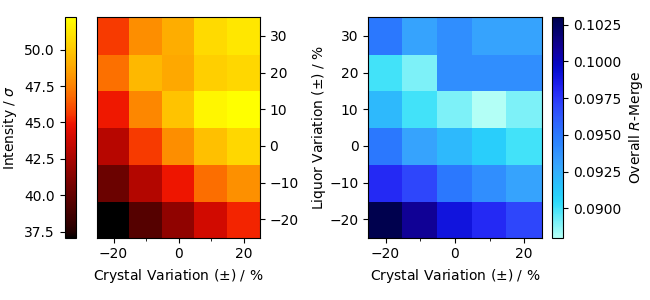

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from mpl_toolkits import mplot3d
import os
import matplotlib.ticker as mticker
import matplotlib
%matplotlib widget
import colorcet as cc
ac_labels = [
    "crm20_lim20","crm10_lim20","cr0_lim20","crp10_lim20","crp20_lim20",
    "crm20_lim10","crm10_lim10","cr0_lim10","crp10_lim10","crp20_lim10",
    "crm20_li0",  "crm10_li0",  "cr0_li0",  "crp10_li0",  "crp20_li0",
    "crm20_lip10","crm10_lip10","cr0_lip10","crp10_lip10","crp20_lip10",
    "crm20_lip20","crm10_lip20","cr0_lip20","crp10_lip20","crp20_lip20",
    "crm20_lip30","crm10_lip30","cr0_lip30","crp10_lip30","crp20_lip30"
    ]

parent_dir = "/dls/i23/data/2024/cm37273-1/processing/tihana/cld"
#parent_dir = input("Path to crystal directory: ")
crystal = (parent_dir.split("/"))[-1]
print(crystal)

# Make directory for plots
if not os.path.exists(os.path.join(parent_dir, 'plots')):
    os.mkdir(os.path.join(parent_dir, 'plots'))

dataset_path = "/dls/i23/data/2024/cm37273-1/processing/tihana/cld/anacor/merged_data"
#dataset_path = input("Path to dataset in anacor: ")
dataset = dataset_path.split("/")
dataset = dataset[-1]

# Put the path to your data files here
file_paths = [
    f'/dls/i23/data/2024/cm37273-1/processing/tihana/cld/csv_files/{dataset}_I_and_r_merge.csv'#,
    #f'/dls/i23/data/2024/cm37273-1/processing/tihana/cld/csv_files/{dataset}_r_merge.csv'
]
file_paths = [f'{os.path.join(parent_dir, "csv_files", f"{dataset}_I_and_r_merge.csv")}']

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = [':acsh:', ':ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['ac_id', 'method', 'I_value', 'rmerge_value'], sep=('  '))
    all_data.append(df)

print(type(df))
df = pd.DataFrame(df)
ac = df[df['method']==':ac:']
ac = ac.set_index(['ac_id']).reindex(ac_labels).reset_index()
acsh = df[df['method']==':acsh:']
acsh = acsh.set_index(['ac_id']).reindex(ac_labels).reset_index()

result1 = ac['I_value']
result2 = ac['rmerge_value']
indexes = ac['ac_id'].to_list()
result3 = acsh['I_value']
result4 = acsh['rmerge_value']

# Create a new DataFrame with the results
results_ac = pd.DataFrame({'Intensity/sigma': result1, 'Overall R-merge': result2})
results_acsh = pd.DataFrame({'Intensity/sigma': result3, 'Overall R-merge': result4})

# Create an array with the length of the DataFrame
#y = np.arange(len(results_df))
y = ac['ac_id'].to_list()

ylabels = np.array([-20, -10, 0, 10, 20, 30])
xlabels = np.array([-20, -10, 0, 10, 20])
X, Y = np.meshgrid(xlabels, ylabels)

isig_data = results_ac['Intensity/sigma']
isig = np.reshape(isig_data.to_list(), (6,5))
print(isig)
indexes = np.reshape(indexes, (6,5))
print(indexes)

rmerge_data = results_ac['Overall R-merge']
rmerge = np.reshape(rmerge_data.to_list(), (6,5))

fig, ax = plt.subplots(1,2, figsize=(6.5,3))

m = ax[0].pcolor(X,Y, isig, cmap= 'cet_CET_L4')
plt.colorbar(m, label="Intensity / $\sigma$", location='left')
ax[0].yaxis.set_label_position('right')
ax[0].yaxis.set_ticks_position('right')

m = ax[1].pcolor(X,Y,rmerge, cmap='cet_CET_L6_r')
plt.colorbar(m, label="Overall $R$-Merge")
for axis in [ax[0]]:
    axis.set_xlabel("Crystal Variation ($\pm$) / %")
    #axis.set_ylabel("Liquor Variation ($\pm$) / %")
ax[1].set_xlabel("Crystal Variation ($\pm$) / %")
fig.tight_layout()
plt.subplots_adjust(wspace=0.5)
ax[0].set_ylabel("Liquor Variation ($\pm$) / %", labelpad=8)
ax[0].xaxis.set_minor_locator(mticker.AutoMinorLocator(n=2))
ax[1].xaxis.set_minor_locator(mticker.AutoMinorLocator(n=2))
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp0/cld_merged_stats.pdf')


ompk
<class 'pandas.core.frame.DataFrame'>
[[17.2 17.5 17.7 17.6 17.8]
 [17.8 17.8 17.9 18.1 18.2]
 [18.3 18.5 18.4 18.7 18.8]
 [18.8 18.7 18.9 18.8 18.7]
 [18.7 19.  18.7 18.8 18.6]
 [18.8 18.7 18.8 18.7 18.6]]
[['crm20_lim20' 'crm10_lim20' 'cr0_lim20' 'crp10_lim20' 'crp20_lim20']
 ['crm20_lim10' 'crm10_lim10' 'cr0_lim10' 'crp10_lim10' 'crp20_lim10']
 ['crm20_li0' 'crm10_li0' 'cr0_li0' 'crp10_li0' 'crp20_li0']
 ['crm20_lip10' 'crm10_lip10' 'cr0_lip10' 'crp10_lip10' 'crp20_lip10']
 ['crm20_lip20' 'crm10_lip20' 'cr0_lip20' 'crp10_lip20' 'crp20_lip20']
 ['crm20_lip30' 'crm10_lip30' 'cr0_lip30' 'crp10_lip30' 'crp20_lip30']]


/tmp/ipykernel_1013396/1340162387.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['ac_id', 'method', 'I_value', 'rmerge_value'], sep=('  '))


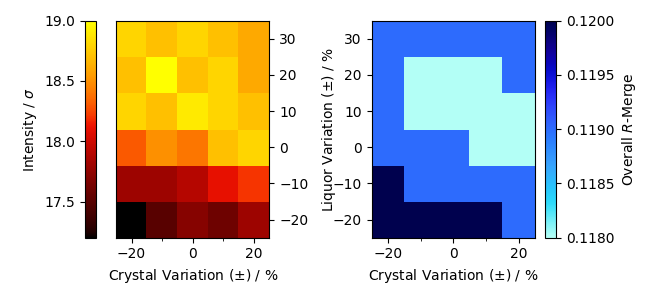

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from mpl_toolkits import mplot3d
import os
import matplotlib

ac_labels = [
    "crm20_lim20","crm10_lim20","cr0_lim20","crp10_lim20","crp20_lim20",
    "crm20_lim10","crm10_lim10","cr0_lim10","crp10_lim10","crp20_lim10",
    "crm20_li0",  "crm10_li0",  "cr0_li0",  "crp10_li0",  "crp20_li0",
    "crm20_lip10","crm10_lip10","cr0_lip10","crp10_lip10","crp20_lip10",
    "crm20_lip20","crm10_lip20","cr0_lip20","crp10_lip20","crp20_lip20",
    "crm20_lip30","crm10_lip30","cr0_lip30","crp10_lip30","crp20_lip30"
    ]

parent_dir = "/dls/i23/data/2024/cm37273-1/processing/tihana/ompk"
crystal = (parent_dir.split("/"))[-1]
print(crystal)

# Make directory for plots
if not os.path.exists(os.path.join(parent_dir, 'plots')):
    os.mkdir(os.path.join(parent_dir, 'plots'))

dataset_path = "/dls/i23/data/2024/cm37273-1/processing/tihana/ompk/anacor/merged"
dataset = dataset_path.split("/")
dataset = dataset[-1]
dataset = 'merged'

# Put the path to your data files here
file_paths = [
    f'/dls/i23/data/2024/cm37273-1/processing/tihana/ompk/csv_files/{dataset}_I_and_r_merge.csv'#,
    #f'/dls/i23/data/2024/cm37273-1/processing/tihana/cld/csv_files/{dataset}_r_merge.csv'
]
file_paths = [f'{os.path.join(parent_dir, "csv_files", f"{dataset}_I_and_r_merge.csv")}']

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = [':acsh:', ':ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['ac_id', 'method', 'I_value', 'rmerge_value'], sep=('  '))
    all_data.append(df)

print(type(df))
df = pd.DataFrame(df)
ac = df[df['method']==':ac:']
ac = ac.set_index(['ac_id']).reindex(ac_labels).reset_index()
acsh = df[df['method']==':acsh:']
acsh = acsh.set_index(['ac_id']).reindex(ac_labels).reset_index()

result1 = ac['I_value']
result2 = ac['rmerge_value']
indexes = ac['ac_id'].to_list()
result3 = acsh['I_value']
result4 = acsh['rmerge_value']

# Create a new DataFrame with the results
results_ac = pd.DataFrame({'Intensity/sigma': result1, 'Overall R-merge': result2})
results_acsh = pd.DataFrame({'Intensity/sigma': result3, 'Overall R-merge': result4})

# Create an array with the length of the DataFrame
#y = np.arange(len(results_df))
y = ac['ac_id'].to_list()

ylabels = np.array([-20, -10, 0, 10, 20, 30])
xlabels = np.array([-20, -10, 0, 10, 20])
X, Y = np.meshgrid(xlabels, ylabels)

isig_data = results_ac['Intensity/sigma']
isig = np.reshape(isig_data.to_list(), (6,5))
print(isig)
indexes = np.reshape(indexes, (6,5))
print(indexes)

rmerge_data = results_ac['Overall R-merge']
rmerge = np.reshape(rmerge_data.to_list(), (6,5))

# HEAT MAP
fig, ax = plt.subplots(1,2, figsize=(6.5,3))

m = ax[0].pcolor(X,Y, isig, cmap= 'cet_CET_L4')
plt.colorbar(m, label="Intensity / $\sigma$", location='left')
ax[0].yaxis.set_label_position('right')
ax[0].yaxis.set_ticks_position('right')

m = ax[1].pcolor(X,Y,rmerge, cmap='cet_CET_L6_r')
plt.colorbar(m, label="Overall $R$-Merge")
for axis in [ax[0]]:
    axis.set_xlabel("Crystal Variation ($\pm$) / %")
    #axis.set_ylabel("Liquor Variation ($\pm$) / %")
ax[1].set_xlabel("Crystal Variation ($\pm$) / %")
fig.tight_layout()
plt.subplots_adjust(wspace=0.5)
ax[0].set_ylabel("Liquor Variation ($\pm$) / %", labelpad=8)
ax[0].xaxis.set_minor_locator(mticker.AutoMinorLocator(n=2))
ax[1].xaxis.set_minor_locator(mticker.AutoMinorLocator(n=2))
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp0/ompk_merged_stats.pdf')
plt.show()